### Full Name : Ariana Koocheki Dariuni
### Student Number : 400103624
___

# Phase 0: Intro

In this assignment, you will implement SVM (Support Vector Machines) for classification and get familier with different kernel functions.

In [1]:
!wget "https://www.dropbox.com/scl/fi/hpm5otpwt0u0f5kpkwitv/UniversalBank.csv?rlkey=tgodjcv885iwk5epvvssjfqtq&st=7rpt406e&dl=1" -O "UniversalBank.csv"

--2024-06-13 15:52:43--  https://www.dropbox.com/scl/fi/hpm5otpwt0u0f5kpkwitv/UniversalBank.csv?rlkey=tgodjcv885iwk5epvvssjfqtq&st=7rpt406e&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29d91640ebdf000cf400c81e26.dl.dropboxusercontent.com/cd/0/inline/CUxjQEIPSKc0Ua8P4x-RcyLDXqPN6RxqRQdPiTou-nXuRVjvcGsHT-6Ku4_Z-Y9ulrUCouj2cpTXWb5XvfsCQ2yvfKnDywa9F7lSaM4TFVgt17WemL416fjKg13MAONiiJx7l6pZB6DYBTsun1NqX-UC/file?dl=1# [following]
--2024-06-13 15:52:44--  https://uc29d91640ebdf000cf400c81e26.dl.dropboxusercontent.com/cd/0/inline/CUxjQEIPSKc0Ua8P4x-RcyLDXqPN6RxqRQdPiTou-nXuRVjvcGsHT-6Ku4_Z-Y9ulrUCouj2cpTXWb5XvfsCQ2yvfKnDywa9F7lSaM4TFVgt17WemL416fjKg13MAONiiJx7l6pZB6DYBTsun1NqX-UC/file?dl=1
Resolving uc29d91640ebdf000cf400c81e26.dl.dropboxusercontent.com (uc29d91640ebdf000cf400c81e26.dl.dropboxuserc

Importing the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Phase 1: Data Processing (20 points)

Load the ```UniversalBank.csv``` dataset as a dataframe.


In [3]:
df = pd.read_csv('UniversalBank.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Show the top rows of the dataframe and the number of rows in the dataframe.

In [4]:
df.shape

(5000, 14)

Check for missing values.

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Drop ID and ZIP Code columns from the dataset.

In [6]:
df = df.drop(columns =['ID', 'ZIP Code'],axis=0)

Plot the Heatmap to see the correlations between features.

Text(0.5, 1.0, 'Correlation Heatmap')

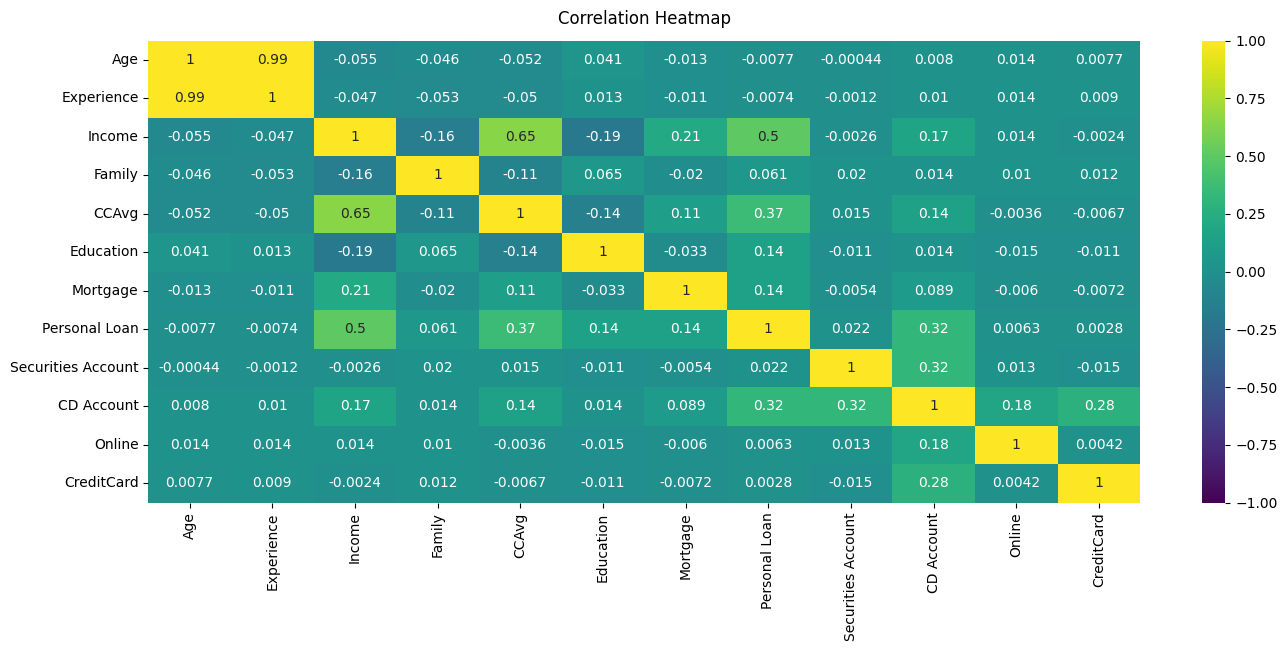

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Scale the data using ```StandardScaler```

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns =['CreditCard'],axis=0))


Split data to features and labels. The ```CreditCard``` column is our target variable. 

In [9]:
X = scaled_data
# changing labels as SVM can understand
y = (df.CreditCard.to_numpy()*2) -1
print("\nFeatures (X):")
print(X.shape)

print("\nLabels (y):")
print(y.shape)


Features (X):
(5000, 11)

Labels (y):
(5000,)


Now split data to train, validation and test parts. 60% of data should be used for train, 20% for validation and 20% for test.

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=11)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=11)

print("\nTraining Features (X_train):")
print(X_train.shape)
print("\nValidation Features (X_val):")
print(X_val.shape)
print("\nTesting Features (X_test):")
print(X_test.shape)



Training Features (X_train):
(3000, 11)

Validation Features (X_val):
(1000, 11)

Testing Features (X_test):
(1000, 11)


# Phase 2: Training and Evaluation (60 points)

Now we will implement the SVM algorithm using Python. Here we will use the Universal Bank Dataset to understand the Support Vector Machine Algorithm.

Using ```SVC()``` function from ```sklearn.svm``` library fit SVM model on train data.

In [11]:
model = SVC()
model.fit(X_train, y_train)

SVC()

Print model accuracy on both test and validation data.

In [12]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")


Validation Accuracy: 0.741
Test Accuracy: 0.759


Plot confusion matrix for ```Actual Positive```, ```Actual Negative```, ```Predict Positive```, and ```Predict Negative``` measurements of the predicted lables.

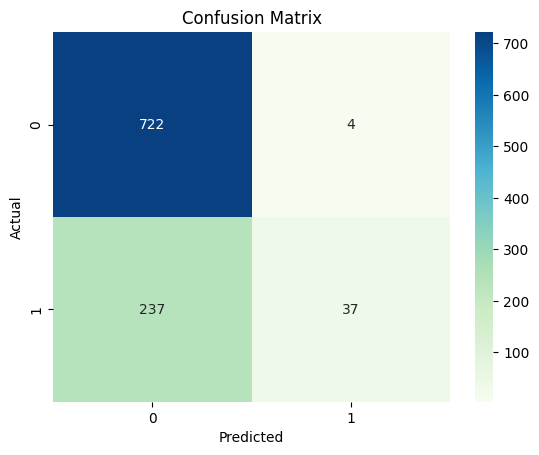

In [13]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="GnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now implement an SVM from scratch without using ```sklearn.svm``` library. You can complete the following ```MySVM``` class.

In [14]:
class MySVM:
    """
    Support Vector Machine (SVM) classifier using linear kernel.

    Attributes:
        learning_rate (float): The learning rate for gradient descent.
        lambda_param (float): The regularization parameter to prevent overfitting.
        n_iters (int): The number of iterations for the gradient descent.
        w (numpy.ndarray): The weight vector.
        b (float): The bias term.

    Methods:
        fit(X, y):
            Trains the SVM model using the provided training data.
        predict(X):
            Predicts the class labels for the provided test data.
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        Initializes the SVM with the given hyperparameters.

        input:
            learning_rate (float): The learning rate for gradient descent. Default is 0.001.
            lambda_param (float): The regularization parameter to prevent overfitting. Default is 0.01.
            n_iters (int): The number of iterations for the gradient descent. Default is 1000.
        """

        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        """
        Trains the SVM model using the provided training data.

        input:
            X (numpy.ndarray): Training data of shape (n_samples, n_features).
            y (numpy.ndarray): True labels for the training data of shape (n_samples,).
        
        The method converts labels to {-1, 1} and performs gradient descent to optimize the weights and bias.
        """

        # Convert labels to {-1, 1}
        y = np.where(y <= 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        """
        Predicts the class labels for the provided test data.

        input:
            X (numpy.ndarray): Test data of shape (n_samples, n_features).

        output:
            numpy.ndarray: Predicted class labels of shape (n_samples,).
        
        The method calculates the decision function and returns the sign of the result.
        """

        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

Fit your model to the train data and evlaute your results.

In [15]:
model = MySVM()
model.fit(X_train , y_train)

In [16]:
#For Evaluation
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")


Validation Accuracy: 0.738
Test Accuracy: 0.754


# Phase 3: Multiclass SVM (30 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

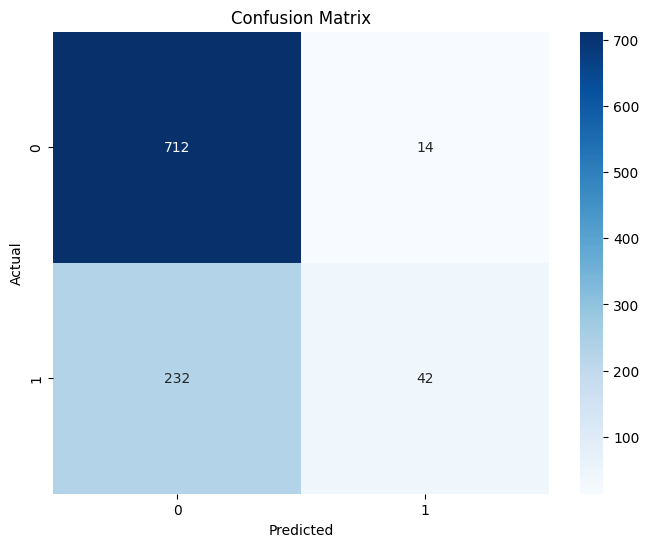

Accuracy: 0.754
Balanced Accuracy: 0.5670004624881865


In [17]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    accuracy = accuracy_score(y_test, y_pred)
    
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return accuracy, balanced_accuracy, cm

# Assuming X_train, X_test, y_train, y_test are already defined
svm = MySVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy, balanced_accuracy, cm = evaluate(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your ```evaluate``` function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [18]:
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10, 100]

### YOUR CODE GOES BELOW HERE ###
best_accuracy = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        
        svm.fit(X_train, y_train)
        
        y_val_pred = svm.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_val_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': C, 'gamma': gamma}

print(f"Best parameters: {best_params}")

Best parameters: {'C': 100, 'gamma': 0.01}


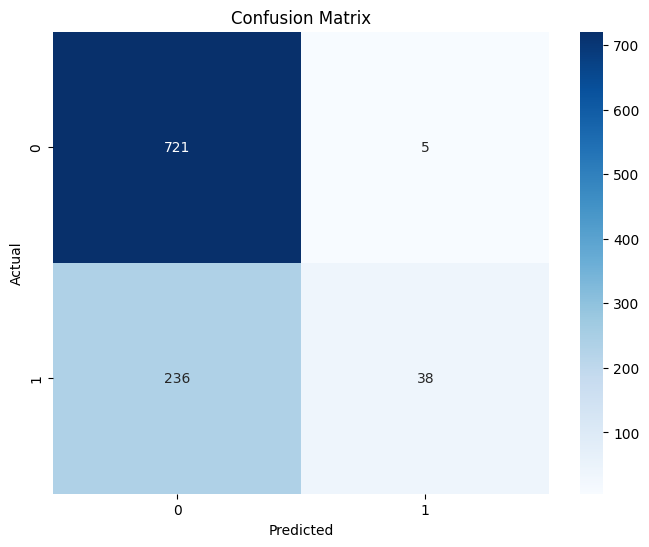

Accuracy: 0.759
Balanced Accuracy: 0.5658995395226317


In [19]:
# Train the best model on the full training data
best_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy, balanced_accuracy, cm = evaluate(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Phase 4: Different SVM Kernels (40 points)

In the context of SVMs, a kernel function acts as a mathematical tool that facilitates the resolution of complex classification problems. Kernels enable the transformation of data into a higher-dimensional feature space, where intricate relationships between data points can be more effectively modeled using linear methods. This capability allows SVMs to handle problems with a vast number of dimensions, potentially even infinite dimensions. Kernel functions play a critical role in data classification tasks by enabling the identification of patterns within the data. Notably, they excel at addressing non-linear problems using a linear approach.

Traditionally, SVMs strive to identify a hyperplane (a straight line in higher dimensions) that optimally separates data points belonging to distinct classes. However, for data exhibiting non-linear relationships, this approach may not be feasible, especially as the dimensionality of the data increases. Kernel functions address this limitation by implicitly transforming the data into a higher-dimensional space where a linear separation becomes possible. This document explores four commonly employed kernel functions used in SVM classification. Subsequent sections will provide implementation examples using various software packages.

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

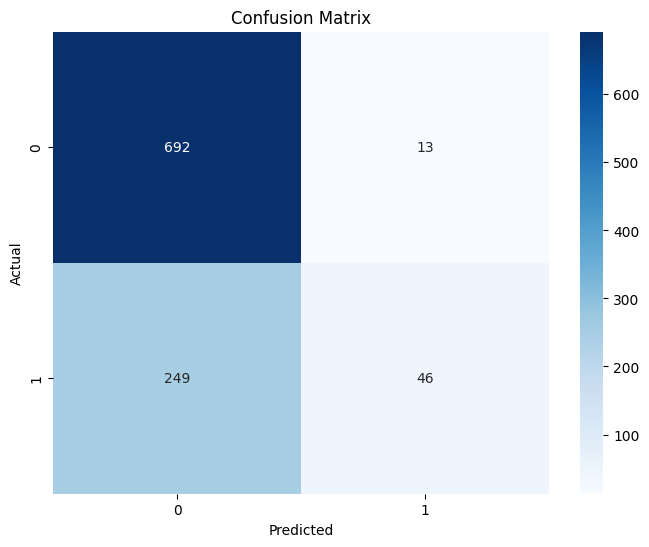

Accuracy: 0.738
Balanced Accuracy: 0.5687462435388869


In [20]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_val_pred = svm_linear.predict(X_val)
accuracy, balanced_accuracy, cm = evaluate(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")


### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

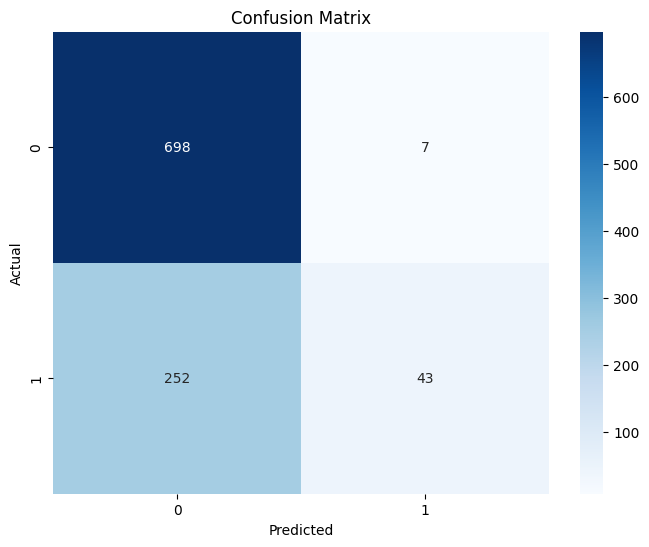

Accuracy: 0.741
Balanced Accuracy: 0.5679168169251112


In [21]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_val_pred = svm_rbf.predict(X_val)

accuracy, balanced_accuracy, cm = evaluate(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

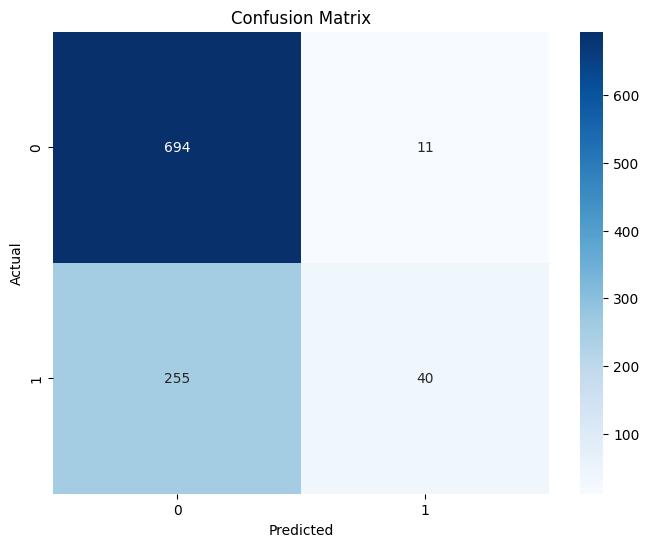

Accuracy: 0.734
Balanced Accuracy: 0.5599951917297752


In [22]:
svm_poly = SVC(kernel='poly', degree=3, coef0=1)
svm_poly.fit(X_train, y_train)
# Predict on the test set
y_val_pred = svm_poly.predict(X_val)

accuracy, balanced_accuracy, cm = evaluate(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

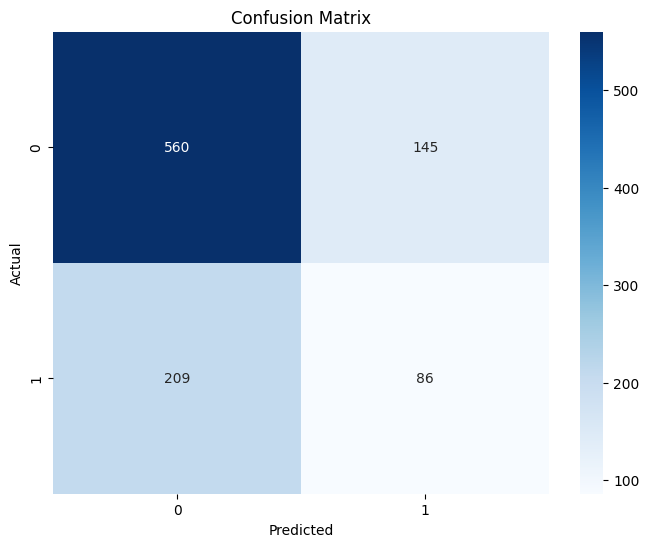

Accuracy: 0.646
Balanced Accuracy: 0.5429258324317827


In [23]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
# Predict on the test set
y_val_pred = svm_sigmoid.predict(X_val)

accuracy, balanced_accuracy, cm = evaluate(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

`TODO: Write Here`

Support Vector Machine (SVM) classifiers employ different kernel functions, each with its own advantages and disadvantages:

Linear Kernel:
  - Advantages: Simple, efficient, and interpretable. Suitable for linearly separable data.
  - Disadvantages: Limited to linear relationships.
  
Polynomial Kernel:
  - Advantages: Flexible, can model non-linear relationships and handle interaction features.
  - Disadvantages: Computationally expensive and prone to overfitting with high degrees.
  
RBF Kernel:
  - Advantages: Highly flexible, effective for non-linear data.
  - Disadvantages: Requires careful tuning of hyperparameters, computationally intensive.
  
Sigmoid Kernel:
  - Advantages: Flexible, similar to neural network activation functions.
  - Disadvantages: Less popular, can be unstable, requires careful hyperparameter tuning.

Key Points:
  - Linear Kernel: Best for linearly separable data.
  - Polynomial Kernel: Good for non-linear relationships but can overfit.
  - RBF Kernel: Highly flexible for non-linear data but requires tuning.
  - Sigmoid Kernel: Mimics neural networks but less commonly used.